<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/ImageManipulate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install firebase-admin
import firebase_admin
import cv2 
from firebase_admin import credentials 
from google.colab.patches import cv2_imshow
from firebase_admin import storage 
import numpy as np
import math
import matplotlib.pyplot as plt 

In [0]:
cred = credentials.Certificate("credentials.json")

# Initialize the app with a service account, granting admin privileges
app = firebase_admin.initialize_app(cred, {
    'storageBucket': 'fir-4ca2c.appspot.com',
}, name='storage')

IMAGE GENERATION 

In [3]:
##GETTING NAMES  -- ##Location - SSCB and DTU : Rotated images  

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

#blobs is an interator :google.api_core.page_iterator.HTTPIterator object at 0x7f2cd11c84e0>

imglenovo = [] #has all the lenovo images by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name[7:16]=="lenovoinS" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
      blob.download_to_filename('/content/' + "lenovo" + str(blob.name.split('/')[-1])+ '.jpeg')
      imglenovo.append("lenovo" + str(blob.name.split('/')[-1])+ '.jpeg') 
      print("lenovo" + str(blob.name.split('/')[-1])+ '.jpeg')
      ctr+=1
      print(ctr)
    

lenovo2019-06-27 17:05:48.jpeg
1
lenovo2019-06-27 17:10:27.jpeg
2
lenovo2019-06-27 17:15:58.jpeg
3
lenovo2019-06-27 18:04:29.jpeg
4
lenovo2019-06-27 18:08:53.jpeg
5
lenovo2019-06-27 18:17:05.jpeg
6
lenovo2019-06-27 18:19:07.jpeg
7
lenovo2019-06-27 18:26:07.jpeg
8
lenovo2019-06-27 18:28:53.jpeg
9
lenovo2019-06-27 18:35:27.jpeg
10
lenovo2019-06-27 18:39:31.jpeg
11
lenovo2019-06-27 18:47:06.jpeg
12
lenovo2019-06-27 18:49:07.jpeg
13
lenovo2019-06-27 18:56:06.jpeg
14
lenovo2019-06-28 06:00:07.jpeg
15
lenovo2019-06-28 06:04:07.jpeg
16
lenovo2019-06-28 06:09:28.jpeg
17
lenovo2019-06-28 06:14:37.jpeg
18
lenovo2019-06-28 06:18:53.jpeg
19
lenovo2019-06-28 06:25:28.jpeg
20
lenovo2019-06-28 06:29:29.jpeg
21
lenovo2019-06-28 06:35:27.jpeg
22
lenovo2019-06-28 06:38:53.jpeg
23
lenovo2019-06-28 06:44:28.jpeg
24
lenovo2019-06-28 06:49:29.jpeg
25
lenovo2019-06-28 06:56:37.jpeg
26
lenovo2019-06-28 07:00:28.jpeg
27
lenovo2019-06-28 07:04:07.jpeg
28
lenovo2019-06-28 07:09:28.jpeg
29
lenovo2019-06-28 07:13:

In [0]:
##READING THEM 

dtu=[]
sscb=[]
for img in imglenovo:
  if(img[11:16]>'07-02'):           ##These indicate the DTU Images - which need to be cropped and rotated 
    im = cv2.imread(img)
    crop = im[700:3150, 0:3120]
    crop = cv2.resize(crop, (int(np.shape(im)[1]*0.1), int(np.shape(im)[0]*0.1)))
    im = cv2.resize(crop,(256,256))
    im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_COUNTERCLOCKWISE)
    dtu.append(im)
  else:
    im = cv2.imread(img)           ##These indicate the SSCB Images - rotation only 
    im = cv2.resize(im, (256,256))
    im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_CLOCKWISE)
    sscb.append(im)
    
    
    

In [5]:
## CHECKING BLOCK 

print(len(dtu))
print(len(sscb))

  

369
502


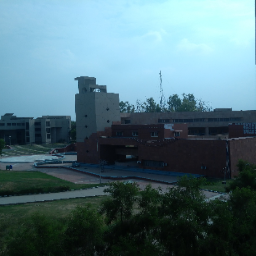

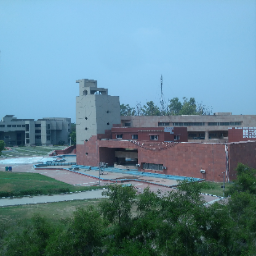

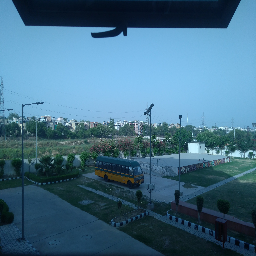

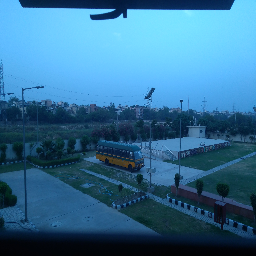

In [8]:
cv2_imshow(dtu[0])
cv2_imshow(dtu[368])
cv2_imshow(sscb[0])
cv2_imshow(sscb[501])

In [0]:
##GETTING NAMES - PUNJABI BAGH 

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

imgpb = [] #has all the minote pictures by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name.split('/')[1]=="rivers.jpg" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
        blob.download_to_filename('/content/' + "pb" + str(blob.name.split('/')[-1])+ '.jpeg')
        imgpb.append("pb" + str(blob.name.split('/')[-1])+ '.jpeg') 
        print("pb" + str(blob.name.split('/')[-1])+ '.jpeg')
        ctr+=1
        

In [0]:
##READING IMAGES - Rotated

pb=[]
for img in imgpb:
  im = cv2.imread(img)
  im = cv2.resize(im, (256,256))
  im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_CLOCKWISE)
  pb.append(im)


In [0]:
##CHECKING BLOCK 

# cv2_imshow(pb[0])
# cv2_imshow(pb[1])


In [0]:
##GETTING NAMES - Location : DTU AND SHADIPUR 

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

imgminote = [] #has all the minote pictures by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name[7:16]=="minoteSSC" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
        blob.download_to_filename('/content/' + "minote" + str(blob.name.split('/')[-1])+ '.jpeg')
        imgminote.append("minote" + str(blob.name.split('/')[-1])+ '.jpeg') 
        print("minote" + str(blob.name.split('/')[-1])+ '.jpeg')
        ctr+=1
        
      


In [0]:
##READING IMAGES - Location - SSCB and SHADIPUR ; Rotation 
shadipur = []
for img in imgminote :     
  if(img[11:16]>'07-05'):              ##Shadipur images needed rotating  
    im = cv2.imread(img)
    im = cv2.resize(im, (256,256))
    im = cv2.rotate(im, rotateCode = cv2.ROTATE_90_COUNTERCLOCKWISE)
    shadipur.append(im)
  else:
    im = cv2.imread(img)               ##SSCB images did not need any rotating 
    im = cv2.resize(im, (256,256))
    sscb.append(im)
    

In [0]:
##CHECKING BLOCK 

# cv2_imshow(minote[0])
# cv2_imshow(minote[1])
# cv2_imshow(minote[100])
# cv2_imshow(minote[900])
# cv2_imshow(minote[950])

In [0]:
##GETTING NAMES - ITO 

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

imgito = [] #has all the minote pictures by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name.split('/')[1]=="Lenovo.JPG" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
        blob.download_to_filename('/content/' + "ito" + str(blob.name.split('/')[-1])+ '.jpeg')
        imgito.append("ito" + str(blob.name.split('/')[-1])+ '.jpeg') 
        print("ito" + str(blob.name.split('/')[-1])+ '.jpeg')
        ctr+=1
        
        
        

In [0]:
print(len(imgito))

In [0]:
##READING BLOCK 

ito=[]

for img in imgito:
  im = cv2.imread(img)
  im = cv2.resize(im,(256,256))
  im = cv2.rotate(im, rotateCode = cv2.ROTATE_90_COUNTERCLOCKWISE)
  ito.append(im) 

In [0]:
##CHECKING BLOCK 

# cv2_imshow(ito[0])
# cv2_imshow(ito[100])


In [0]:
print(np.shape(sscb))    
print(np.shape(ito))      
print(np.shape(dtu))  
print(np.shape(shadipur))     
print(np.shape(pb))     



FEATURE GENERATION 

In [0]:
k = len(sscb)
sscb = np.reshape(sscb,(k,1))
print(np.shape(sscb))

k = len(pb)
pb = np.reshape(pb,(k,1))
print(np.shape(pb))

k = len(ito)
ito = np.reshape(ito,(k,1))
print(np.shape(ito))

k = len(dtu)
dtu = np.reshape(dtu,(k,1))
print(np.shape(dtu))

k = len(shadipur)
dtu = np.reshape(shadipur,(k,1))
print(np.shape(shadipur))


LABEL PROCESSING 

In [7]:
df = pd.read_csv('/content/dtu_labels.csv')
data = df.mask(df.eq('None')).dropna()
file = data.to_csv('/content/dtu_labels_new.csv')


df_ = pd.read_csv('/content/labels_pb.csv')
data_ = df_.mask(df.eq('None')).dropna()
file_ = data_.to_csv('/content/labels_pb_new.csv')

df_ = pd.read_csv('/content/shadipur_labels.csv')
data_ = df_.mask(df.eq('None')).dropna()
file_ = data_.to_csv('/content/shadipur_labels_new.csv')

df_ = pd.read_csv('/content/shadipur_labels.csv')
data_ = df_.mask(df.eq('None')).dropna()
file_ = data_.to_csv('/content/shadipur_labels_new.csv')


NameError: ignored

In [0]:
k=0
cpcb=[]


with open('/content/labels_dtu.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>=18):
      l=[]
      l.append(row[0])
      l.append(row[1]) #PM
      cpcb.append(l)      
  
with open('/content/labels_pb_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>=3):
      l=[]
      l.append(row[2])
      l.append(row[4]) #PM
      l.append(row[3]) #RH
      cpcb.append(l)      

In [0]:
#names = np.vstack((imgminote , imgito, imglenovo,imgpb))
images = np.vstack((dtu, sscb, pb, shadipur, ito))

dict={}

for i in range(0,len(images)):
  im = images[i]
  name = names[i]
  print(name)
  l=[]
  l.append(np.ndarray.flatten(transmission(im,retMean = False)))
  l.append(entropy(im))
  l.append(contrast(im))
  dict[name[0]]=l
 

In [239]:
for name in names:
  print(name)

['minote2019-06-27 16:42:56.jpeg']
['minote2019-06-27 16:49:53.jpeg']
['minote2019-06-27 16:50:47.jpeg']
['minote2019-06-27 16:51:15.jpeg']
['minote2019-06-27 16:54:37.jpeg']
['minote2019-06-27 16:59:33.jpeg']
['minote2019-06-27 17:04:38.jpeg']
['minote2019-06-27 17:05:00.jpeg']
['minote2019-06-27 17:09:17.jpeg']
['minote2019-06-27 17:14:39.jpeg']
['minote2019-06-27 17:19:17.jpeg']
['minote2019-06-27 17:24:39.jpeg']
['minote2019-06-27 17:29:17.jpeg']
['minote2019-06-27 17:37:58.jpeg']
['minote2019-06-27 17:39:17.jpeg']
['minote2019-06-27 17:46:28.jpeg']
['minote2019-06-27 17:49:20.jpeg']
['minote2019-06-27 17:54:17.jpeg']
['minote2019-06-27 18:01:16.jpeg']
['minote2019-06-27 18:05:04.jpeg']
['minote2019-06-27 18:09:35.jpeg']
['minote2019-06-27 18:14:59.jpeg']
['minote2019-06-27 18:19:18.jpeg']
['minote2019-06-27 18:24:40.jpeg']
['minote2019-06-27 18:29:18.jpeg']
['minote2019-06-27 18:35:06.jpeg']
['minote2019-06-27 18:39:38.jpeg']
['minote2019-06-27 18:47:35.jpeg']
['minote2019-06-27 1

In [0]:
print(dict)

In [229]:
print(len(dict))

2915


In [236]:
print(dict.keys())

dict_keys(['minote2019-06-27 16:42:56.jpeg', 'minote2019-06-27 16:49:53.jpeg', 'minote2019-06-27 16:50:47.jpeg', 'minote2019-06-27 16:51:15.jpeg', 'minote2019-06-27 16:54:37.jpeg', 'minote2019-06-27 16:59:33.jpeg', 'minote2019-06-27 17:04:38.jpeg', 'minote2019-06-27 17:05:00.jpeg', 'minote2019-06-27 17:09:17.jpeg', 'minote2019-06-27 17:14:39.jpeg', 'minote2019-06-27 17:19:17.jpeg', 'minote2019-06-27 17:24:39.jpeg', 'minote2019-06-27 17:29:17.jpeg', 'minote2019-06-27 17:37:58.jpeg', 'minote2019-06-27 17:39:17.jpeg', 'minote2019-06-27 17:46:28.jpeg', 'minote2019-06-27 17:49:20.jpeg', 'minote2019-06-27 17:54:17.jpeg', 'minote2019-06-27 18:01:16.jpeg', 'minote2019-06-27 18:05:04.jpeg', 'minote2019-06-27 18:09:35.jpeg', 'minote2019-06-27 18:14:59.jpeg', 'minote2019-06-27 18:19:18.jpeg', 'minote2019-06-27 18:24:40.jpeg', 'minote2019-06-27 18:29:18.jpeg', 'minote2019-06-27 18:35:06.jpeg', 'minote2019-06-27 18:39:38.jpeg', 'minote2019-06-27 18:47:35.jpeg', 'minote2019-06-27 18:49:17.jpeg', 'mi

In [230]:
tmp=[]
for key in dict:
  temp=key[-24:-5]
  temp=temp.split('-')
  
  newtemp=temp[2].split(' ')
  
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  tmp.append(final)
  
  
print(len(tmp))

2915


In [0]:
##Modified timestamp with e,c,t

i=0
ecttime=[]
for key in dict:
  l=[]
  l.append(tmp[i])
  l.append(dict[key])
  ecttime.append(l)
  i+=1

In [234]:
print(len(ecttime))

2915


LABEL GENERATION 

In [0]:
def transmission(img, lt = 230, retMean = False):
  ker = np.ones((3, 3))/9.0
  imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  b, g, r = cv2.split(img)
  hsv = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2HSV)
  _, _, v = cv2.split(hsv)
  v_blur = cv2.filter2D(v, -1, ker)
  _,building_mask = cv2.threshold(v_blur, lt, 255, cv2.THRESH_BINARY)
  sky = cv2.bitwise_and(imgrgb, imgrgb, mask = building_mask)
  sky_mask = cv2.bitwise_not(building_mask, building_mask.copy())
  building = cv2.bitwise_and(imgrgb, imgrgb, mask = sky_mask)
 
  al = max(v_blur.flatten())
  #Airlight Found. Now calculate Transmission Map
  img_norm = img/float(al)
  b, g, r = cv2.split(img_norm)
  kernel = np.ones((3,3),np.uint8)
  im_new = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      im_new[i][j] = min(b[i][j], g[i][j], r[i][j])
  dcp = cv2.erode(im_new, kernel, iterations = 1)
  #ax[3].imshow(im_new, cmap = 'gray')
  #ax[4].imshow(dcp, cmap = 'gray')
  tr = np.ones((dcp.shape[0], dcp.shape[1]))
  for i in range(dcp.shape[0]):
    for j in range(dcp.shape[1]):
      tr[i][j] = 1 - dcp[i][j]
  #ax[1].imshow(tr, cmap = 'gray')
  if retMean == False:
    return tr
  elif retMean == True:
    return np.mean(tr)

In [0]:
def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
    
  return (-1 * ent[0])

In [0]:
def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  mean = np.mean(image)
  x = (-1 * mean * (np.ones(image.shape)))
  ss = np.square(np.add(image, x))
  cont = np.sqrt(np.sum(ss)/float(image.size))
  return cont